In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

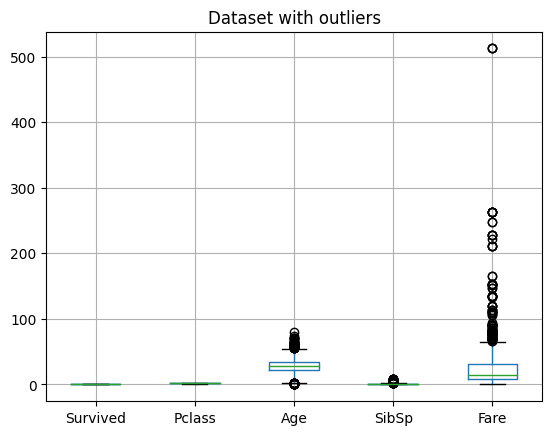

In [ ]:
plt.title("Dataset with outliers")
df.boxplot()
plt.show()

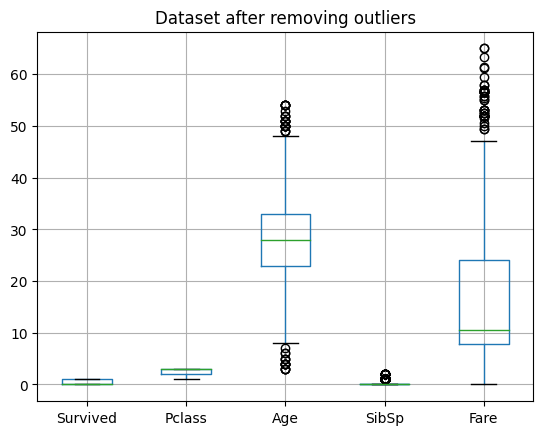

In [ ]:
cols = ['Age','SibSp','Fare']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.title("Dataset after removing outliers")
df.boxplot()
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
climate = ['C','S','Q']
en= OrdinalEncoder(categories = [climate])
df['Embarked']=en.fit_transform(df[["Embarked"]])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,1.0
2,1,3,female,26.0,0,7.9250,1.0
3,1,1,female,35.0,1,53.1000,1.0
4,0,3,male,35.0,0,8.0500,1.0
5,0,3,male,28.0,0,8.4583,2.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
climate = ['male','female']
en= OrdinalEncoder(categories = [climate])
df['Sex']=en.fit_transform(df[["Sex"]])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0.0,22.0,1,7.2500,1.0
2,1,3,1.0,26.0,0,7.9250,1.0
3,1,1,1.0,35.0,1,53.1000,1.0
4,0,3,0.0,35.0,0,8.0500,1.0
5,0,3,0.0,28.0,0,8.4583,2.0


In [ ]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=['Survived','Pclass','Sex','Age','SibSp','Fare','Embarked'])
df.head()


,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0.0,0.0,0.0,-0.6,1.0,-0.200824,0.0
1,1.0,0.0,1.0,-0.2,0.0,-0.159115,0.0
2,1.0,-2.0,1.0,0.7,1.0,2.632343,0.0
3,0.0,0.0,0.0,0.7,0.0,-0.151391,0.0
4,0.0,0.0,0.0,0.0,0.0,-0.126161,1.0


In [ ]:
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer 
qt=QuantileTransformer(output_distribution='normal',n_quantiles=692)

df1=pd.DataFrame()
df1["Survived"]=np.sqrt(df["Survived"])
df1["Pclass"],parameters=stats.yeojohnson(df["Pclass"])
df1["Sex"]=np.sqrt(df["Sex"])
df1["Age"]=df["Age"]
df1["SibSp"],parameters=stats.yeojohnson(df["SibSp"])
df1["Fare"],parameters=stats.yeojohnson(df["Fare"])
df1["Embarked"]=df["Embarked"]
df1.skew()

Survived    0.658537
Pclass     -0.562623
Sex         0.805353
Age         0.265991
SibSp       1.166560
Fare        0.018885
Embarked   -0.111527
dtype: float64

In [ ]:
import matplotlib
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

X = df1.drop("Survived",1) 
y = df1["Survived"]          


<ipython-input-13-0f8dc28e379b>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df1.drop("Survived",1)


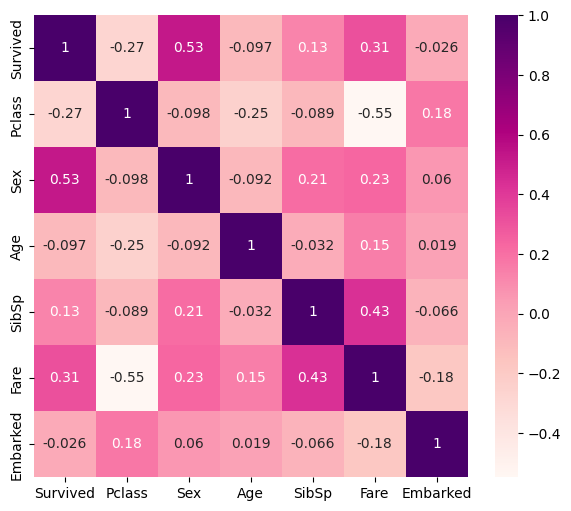

In [ ]:
plt.figure(figsize=(7,6))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdPu)
plt.show()

In [ ]:
cor_target = abs(cor["Survived"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Survived    1.000000
Sex         0.526976
Name: Survived, dtype: float64

In [ ]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const       3.565235e-08
Pclass      3.674624e-06
Sex         1.118233e-42
Age         1.636699e-04
SibSp       1.025286e-01
Fare        5.608883e-04
Embarked    9.565852e-01
dtype: float64

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Pclass', 'Sex', 'Age', 'Fare']


In [ ]:
model = LinearRegression()

rfe = RFE(model,step= 4)

X_rfe = rfe.fit_transform(X,y)  

model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False False]
[1 1 2 1 2 2]


In [ ]:
nof_list=np.arange(1,6)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,step=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.344046


In [ ]:
cols = list(X.columns)
model = LinearRegression()
rfe = RFE(model, step=2)             
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Pclass', 'Sex', 'SibSp'], dtype='object')


Best alpha using built-in LassoCV: 0.002683
Best score using built-in LassoCV: 0.346165
Lasso picked 4 variables and eliminated the other 2 variables


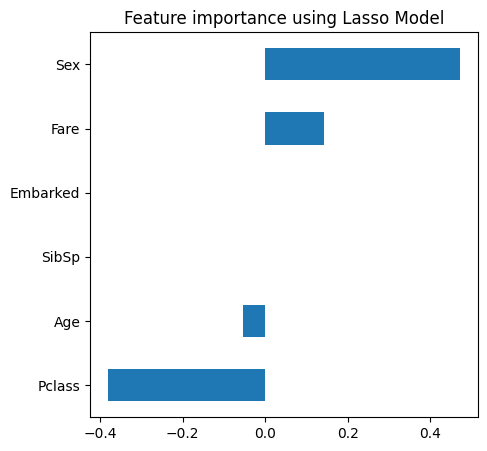

In [32]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()